In [1]:
import pandas as pd 
pd.options.mode.chained_assignment = None 
import numpy as np  
seed = 0
np.random.seed(seed) 
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.metrics import accuracy_score
 
import datetime as dt  
import re  
import string  
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords   
 
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory  

from wordcloud import WordCloud   
 
import nltk 

nltk.data.path.append(r"C:\Users\acer\AppData\Roaming\nltk_data")

nltk.download('punkt')
nltk.download('punkt_tab') 
nltk.download('stopwords')

import csv
import requests
from io import StringIO

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from nltk.stem import WordNetLemmatizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from imblearn.over_sampling import SMOTE

from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.metrics import classification_report, confusion_matrix

from sklearn.model_selection import GridSearchCV

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv('gojek_reviews.csv')
df.head()

,content,score
0,mantap,5
1,hapus aja limit paylater saya percuma ada juga...,2
2,L app! ditanya mau mamam apaaaa? makan resto??...,1
3,mantap..lokasi tidak lari lagi...,5
4,Cukup membantu hingga saat ini.,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  1000 non-null   object
 1   score    1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [4]:
df.isnull().sum()

content    0
score      0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(199)

In [6]:
slangwords = {
    "gk": "nggak",
    "ga": "tidak",
    "gak": "tidak",
    "ngga": "tidak",
    "nggak": "tidak",
    "tdk": "tidak",
    "sm": "sama",
    "tp": "tapi",
    "bgt": "banget",
    "bngt": "banget",
    "dgn": "dengan",
    "dg": "dengan",
    "aja": "saja",
    "jg": "juga",
    "dlm": "dalam",
    "krn": "karena",
    "karna": "karena",
    "dr": "dari",
    "dri": "dari",
    "utk": "untuk",
    "biar": "supaya",
    "trs": "terus",
    "trus": "terus",
    "udh": "sudah",
    "udh": "sudah",
    "udah": "sudah",
    "sdh": "sudah",
    "blm": "belum",
    "belom": "belum",
    "dpt": "dapat",
    "dapet": "dapat",
    "ajaib": "hebat",
    "klo": "kalau",
    "klw": "kalau",
    "klu": "kalau",
    "kmu": "kamu",
    "km": "kamu",
    "aq": "aku",
    "sy": "saya",
    "gw": "saya",
    "gue": "saya",
    "loe": "kamu",
    "lu": "kamu",
    "loh": "lho",
    "pls": "tolong",
    "plszz": "tolong",
    "mksh": "makasih",
    "mksih": "makasih",
    "thx": "terima kasih",
    "tq": "terima kasih",
    "btw": "ngomong-ngomong",
    "idk": "tidak tahu",
    "wkwk": "haha",
    "wk": "haha",
    "wkwkwk": "haha",
    "hehe": "haha",
    "hahaha": "haha",
    "xixixi": "haha",
    "mantul": "mantap betul",
    "mantapdjiwa": "mantap",
    "cuy": "teman",
    "bro": "teman",
    "sis": "teman",
    "bang": "kakak",
    "mbak": "kakak",
    "gan": "juragan",
    "min": "admin"
}


In [7]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#[A-Za-z0-9]+', '', text)
    text = re.sub(r'RT[\s]', '', text) 
    text = re.sub(r"http\S+", '', text) 
    text = re.sub(r'[0-9]+', '', text) 
    text = re.sub(r'[^\w\s]', '', text) 
 
    text = text.replace('\n', ' ') 
    text = text.translate(str.maketrans('', '', string.punctuation)) 
    text = text.strip(' ') 
    return text
 
def casefoldingText(text): 
    text = text.lower()
    return text
 
def tokenizingText(text): 
    text = word_tokenize(text)
    return text
 
def filteringText(text): 
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text
 
factory = StemmerFactory()
stemmer = factory.create_stemmer()
lemmatizer = WordNetLemmatizer()

def stemming_lemmatizing(tokens):
    final_words = []
    for word in tokens:
        # Cek: kalau alphabet semua dan ada di kamus stopwords inggris → pakai lemmatizer
        if word.isalpha() and word in stopwords.words('english'):
            lemma = lemmatizer.lemmatize(word)
            final_words.append(lemma)
        else:
            # default: pakai stemming Indonesia
            final_words.append(stemmer.stem(word))
    return final_words
 
def toSentence(list_words): # Mengubah daftar kata menjadi kalimat
    sentence = ' '.join(word for word in list_words)
    return sentence

def fix_slangwords(text):
    words = text.split()
    fixed_words = []
    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)
    return ' '.join(fixed_words)


In [8]:
df['cleaned'] = df['content'].apply(cleaningText)
df['cleaned'] = df['cleaned'].apply(casefoldingText)
df['cleaned'] = df['cleaned'].apply(fix_slangwords)
df['cleaned'] = df['cleaned'].apply(tokenizingText)
df['cleaned'] = df['cleaned'].apply(filteringText)
df['cleaned'] = df['cleaned'].apply(stemming_lemmatizing)
df['cleaned'] = df['cleaned'].apply(toSentence)

df.head()

,content,score,cleaned
0,mantap,5,mantap
1,hapus aja limit paylater saya percuma ada juga...,2,hapus limit paylater jugaga
2,L app! ditanya mau mamam apaaaa? makan resto??...,1,l app mamam apaaaa makan resto ketik menu knp ...
3,mantap..lokasi tidak lari lagi...,5,mantaplokasi lari
4,Cukup membantu hingga saat ini.,4,bantu


In [9]:
lexicon_positive = dict()
 
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')

if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')
 
    for row in reader:
        lexicon_positive[row[0]] = int(row[1])
else:
    print("Failed to fetch positive lexicon data")
 
lexicon_negative = dict()
 
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
 
if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')
 
    for row in reader:
        lexicon_negative[row[0]] = int(row[1])
else:
    print("Failed to fetch negative lexicon data")

In [10]:
def sentiment_analysis_lexicon_indonesia(text):
 
    score = 0
 
    for word in text:
 
        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
 
    for word in text:
 
        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
 
    polarity=''
 
    if (score >= 0):
        polarity = 'positive'
    elif (score < 0):
        polarity = 'negative'
 
    else:
        polarity = 'neutral'
 
    return score, polarity

In [11]:
results = df['cleaned'].apply(tokenizingText).apply(sentiment_analysis_lexicon_indonesia)
df['score'] = [result[0] for result in results]
df['polarity'] = [result[1] for result in results]
df.head(10)

,content,score,cleaned,polarity
0,mantap,5,mantap,positive
1,hapus aja limit paylater saya percuma ada juga...,-3,hapus limit paylater jugaga,negative
2,L app! ditanya mau mamam apaaaa? makan resto??...,-2,l app mamam apaaaa makan resto ketik menu knp ...,negative
3,mantap..lokasi tidak lari lagi...,-2,mantaplokasi lari,negative
4,Cukup membantu hingga saat ini.,-1,bantu,negative
5,Sekalinya erorr menyebalkan dan memuakkan,-6,sekali erorr sebal muak,negative
6,aplikasi mudah digunakan,-1,aplikasi mudah,negative
7,tidak bisa batalkan pesanan yg gak sengaja sal...,-13,batal pesan yg sengaja salah pesan,negative
8,Saran atau berlakukan.kalau customer nya wani...,-18,saran berlakukankalau customer wanita kasih dr...,negative
9,oke,2,oke,positive


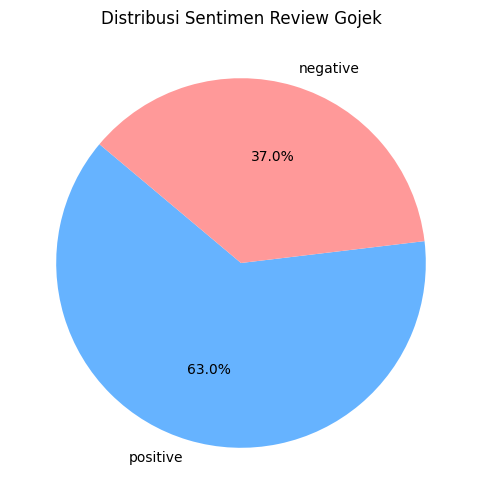

In [12]:
df['polarity'].value_counts().plot.pie(
    autopct='%1.1f%%',
    figsize=(6, 6),
    startangle=140,
    colors=['#66b3ff', '#ff9999', '#99ff99']
)
plt.ylabel('')
plt.title('Distribusi Sentimen Review Gojek')
plt.show()

In [13]:
df['polarity'].value_counts()

polarity
positive    630
negative    370
Name: count, dtype: int64

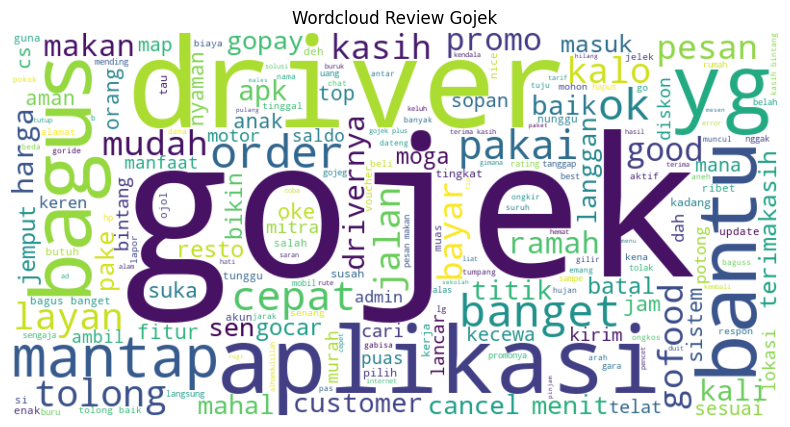

In [14]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['cleaned']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud Review Gojek')
plt.show()

In [15]:
x = df['cleaned']
y = df['polarity']

tfidf = TfidfVectorizer(analyzer='char', ngram_range=(2, 3), max_features=20000)
X_tfidf = tfidf.fit_transform(x)

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [16]:
svm_model = LinearSVC(C=0.1, random_state=42, max_iter=5000)

svm_model.fit(X_train, y_train)

y_pred_train_svm = svm_model.predict(X_train)
y_pred_test_svm = svm_model.predict(X_test)

print("Train Accuracy (SVM):", accuracy_score(y_train, y_pred_train_svm))
print("Test Accuracy (SVM):", accuracy_score(y_test, y_pred_test_svm))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_test_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_test_svm))


Train Accuracy (SVM): 0.91625
Test Accuracy (SVM): 0.88

Confusion Matrix:
 [[ 61  12]
 [ 12 115]]

Classification Report:
               precision    recall  f1-score   support

    negative       0.84      0.84      0.84        73
    positive       0.91      0.91      0.91       127

    accuracy                           0.88       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.88      0.88      0.88       200



In [32]:
param_grid = {'C': [0.1, 0.8, 0.899, 0.95, 0.94, 0.89, 0.9, 0.9001, 0.91, 0.93, 0.95, 1, 1.1, 1.5, 1.52, 1.53, 1.54, 1.545, 1.546, 1.547, 1.548, 1.549, 1.55, 1.53, 1.555, 1.6, 1.65, 1.7, 1.75, 1.85, 2, 3, 5, 10]}
grid_svm = GridSearchCV(LinearSVC(random_state=42, max_iter=5000), 
                        param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_svm.fit(X_train, y_train)

print("Best Params:", grid_svm.best_params_)
print("Best CV Accuracy:", grid_svm.best_score_)

best_svm = grid_svm.best_estimator_
y_pred_test = best_svm.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred_test))


Best Params: {'C': 0.899}
Best CV Accuracy: 0.8462500000000001

Classification Report:
               precision    recall  f1-score   support

    negative       0.82      0.82      0.82        73
    positive       0.90      0.90      0.90       127

    accuracy                           0.87       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.87      0.87      0.87       200



In [18]:
logistic_regression = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
logistic_regression.fit(X_train, y_train)

y_pred = logistic_regression.predict(X_test.toarray())

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[ 65   8]
 [ 23 104]]
              precision    recall  f1-score   support

    negative       0.74      0.89      0.81        73
    positive       0.93      0.82      0.87       127

    accuracy                           0.84       200
   macro avg       0.83      0.85      0.84       200
weighted avg       0.86      0.84      0.85       200

